# LendingClub Default Predication

## <font color=blue>Goal:</font>
Building a model to predict if an applicant will default or not based on the history dataset. 

## <font color=blue>Data Overview:</font>
This dataset contains 1.648M entries and 150 columns. <br>
It takes a memory usage of 1.8+G Bytes.<br>
The classification lables are stored in the 'loan_status' column.<br>

## <font color=blue>Phase 1: Preproccess:</font>

### <font color=blue>Package Loading and Data Reading</font>
Only the most frequently used pakages are loaded hear. Other packages will be loaded before they are invoked.

In [1]:
import numpy as np
np.seterr(all='ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# define a function to display a sentence box.
# parameters:
# s: the sentence
# number: the number of stars in each line to draw the box, default value is 40
def Separate(s, number=40):
    print()
    print('*'*40)
    print(s)
    print('*'*40)

Separate('Prepare for data reading.')


****************************************
Prepare for data reading.
****************************************


In [2]:
df_origin = pd.read_csv('../../DataSet/accepted_2007_to_2017Q3.csv.gz', compression='gzip')

C:\Users\houfang\AppData\Local\Temp\ipykernel_9196\1969907232.py:1: DtypeWarning: Columns (0,18,48,58,117,128,129,130,133,134,135,138,144,145,146) have mixed types. Specify dtype option on import or set low_memory=False.
  df_origin = pd.read_csv('../../DataSet/accepted_2007_to_2017Q3.csv.gz', compression='gzip')


In [3]:
df_origin.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,C1,MANAGEMENT,10+ years,RENT,78000.0,Source Verified,Dec-2014,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,235xx,VA,12.03,0.0,Aug-1994,750.0,754.0,0.0,NaN,NaN,6.0,0.0,138008.0,29.0,17.0,w,0.00,0.00,17392.37,17392.37,15000.00,2392.37,0.0,0.00,0.0000,Jun-2016,12017.81,NaN,Nov-2017,684.0,680.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,149140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,184500.0,NaN,NaN,NaN,5.0,29828.0,9525.0,4.7,0.0,0.0,103.0,244.0,1.0,1.0,0.0,47.0,NaN,NaN,NaN,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,A3,Truck Driver Delivery Personel,8 years,MORTGAGE,58000.0,Not Verified,Dec-2014,Charged Off,n,NaN,credit_card,Credit card refinancing,937xx,CA,14.92,0.0,Sep-1989,710.0,714.0,2.0,42.0,NaN,17.0,0.0,6133.0,31.6,36.0,w,0.00,0.00,6611.69,6611.69,5217.75,872.67,0.0,521.27,93.8286,Aug-2016,321.08,NaN,Feb-2017,564.0,560.0,0.0,59.0,1.0,Individual,NaN,NaN,NaN,0.0,0.0,162110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19400.0,NaN,NaN,NaN,7.0,9536.0,7599.0,41.5,0.0,0.0,76.0,290.0,1.0,1.0,1.0,5.0,42.0,1.0,42.0,4.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,0.0,0.0,4.0,83.3,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
df_origin.dtypes

id                                             object
member_id                                     float64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                      float64
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
desc                        

In [5]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646801 entries, 0 to 1646800
Columns: 150 entries, id to settlement_term
dtypes: float64(113), object(37)
memory usage: 1.8+ GB


###  <font color=blue>Identify the target classification label</font>

In [6]:
df_origin['loan_status'].value_counts()

Current                                                788950
Fully Paid                                             646902
Charged Off                                            168084
Late (31-120 days)                                      23763
In Grace Period                                         10474
Late (16-30 days)                                        5786
Does not meet the credit policy. Status:Fully Paid       1988
Does not meet the credit policy. Status:Charged Off       761
Default                                                    70
Name: loan_status, dtype: int64

<span style="color:#009999">
The 'Fully Paid' rows will be ragarded as '0', and the 'Charged Off' rows will be ragarded as '1' for the model training.<br>
The 'Current' rows involve both possible future 'Fully Paid' and 'Charged off' customers, so they will be dropped<br>
The rows with the left 6 values can be regarded as '1' or ignored as an experiment of sensitivity adjustment.<br></span>

In [7]:
df_labeled = df_origin[(df_origin['loan_status']=='Fully Paid') | (df_origin['loan_status']=='Charged Off')].copy()

status_map={
    'Fully Paid':0,
    'Charged Off':1
}

df_labeled['loan_status'] = df_labeled['loan_status'].map(status_map)
print(df_labeled['loan_status'].value_counts())

label_0_count = (df_labeled['loan_status']==0).sum()
label_1_count = (df_labeled['loan_status']==1).sum()
print("0 counts: {}".format(label_0_count))
print("1 counts: {}".format(label_1_count))

0    646902
1    168084
Name: loan_status, dtype: int64
0 counts: 646902
1 counts: 168084


<span style="color:#009999">
It is a little imbalanced, but acceptable.<br></span>

###  <font color=blue>Check columns with missing values and unique values</font>

In [8]:
missing_count = pd.DataFrame(df_labeled.isnull().sum()).reset_index()
missing_count.rename(columns={'index':'col_name', 0:'missing'}, inplace=True)
missing_count['missing_ratio'] = missing_count['missing']/len(df_labeled)
missing_count[missing_count['missing_ratio']>0.1].count()

col_name         61
missing          61
missing_ratio    61
dtype: int64

In [9]:
missing_count[missing_count['missing_ratio']>0.1].sort_values(by='missing_ratio', ascending = False)

,col_name,missing,missing_ratio
1,member_id,814986,1.000000
48,next_pymnt_d,814986,1.000000
139,orig_projected_additional_accrued_interest,814885,0.999876
126,sec_app_mths_since_last_major_derog,814683,0.999628
134,hardship_end_date,814395,0.999275
128,hardship_type,814395,0.999275
129,hardship_reason,814395,0.999275
131,deferral_term,814395,0.999275
132,hardship_amount,814395,0.999275
133,hardship_start_date,814395,0.999275


<span style="color:#009999">
0.1 is a threshold of missint ratio to determine whether to drop the whole column or not. It can be adjusted through experiments.<br>
There is a big gap between 0.511875 and 0.144433 in the 'missing_ratio'.<br>
Dropping all the 'missing_ratio'>0.5 seems a safe option.<br>
<br></span>

In [10]:
columns_todrop = missing_count[missing_count['missing_ratio']>0.5]['col_name']
df_missing_dropped = df_labeled.drop(columns_todrop, axis=1)
df_missing_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814986 entries, 0 to 1646792
Data columns (total 92 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          814986 non-null  object 
 1   loan_amnt                   814986 non-null  float64
 2   funded_amnt                 814986 non-null  float64
 3   funded_amnt_inv             814986 non-null  float64
 4   term                        814986 non-null  object 
 5   int_rate                    814986 non-null  float64
 6   installment                 814986 non-null  float64
 7   grade                       814986 non-null  object 
 8   sub_grade                   814986 non-null  object 
 9   emp_title                   766415 non-null  object 
 10  emp_length                  772733 non-null  object 
 11  home_ownership              814986 non-null  object 
 12  annual_inc                  814986 non-null  float64
 13  verification_

<span style="color:red">
It is a 814986 rows * 92 columns table now.
    <br></span>
<br>
<span style="color:#009999">
If a column takes only one unique value, this is useless information for any classification model. So, I will drop it.<br>
<br></span>

In [11]:
columns_todrop = list(df_missing_dropped.columns[df_missing_dropped.nunique()==1])
df_unique_dropped = df_missing_dropped.drop(columns_todrop, axis=1)
df_unique_dropped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814986 entries, 0 to 1646792
Data columns (total 87 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          814986 non-null  object 
 1   loan_amnt                   814986 non-null  float64
 2   funded_amnt                 814986 non-null  float64
 3   funded_amnt_inv             814986 non-null  float64
 4   term                        814986 non-null  object 
 5   int_rate                    814986 non-null  float64
 6   installment                 814986 non-null  float64
 7   grade                       814986 non-null  object 
 8   sub_grade                   814986 non-null  object 
 9   emp_title                   766415 non-null  object 
 10  emp_length                  772733 non-null  object 
 11  home_ownership              814986 non-null  object 
 12  annual_inc                  814986 non-null  float64
 13  verification_

<span style="color:red">
It is a 814986 rows * 87 columns table now.<br>

<br>
    In some cases, 'missing' itself is an indicator of the final classification labels. So, we can perform some further exploration.
    <br></span>

In [13]:
# Calculate the missing ratio of the columns with missing values in 2 subsets of the whole dataset.
# The subsets are divided according to the 'loan_status' classification label.
missing_count_byLable0 = pd.DataFrame(df_unique_dropped[df_unique_dropped['loan_status']==0].isnull().sum().reset_index())
missing_count_byLable0.rename(columns={'index':'col_name', 0:'missing'}, inplace=True)
missing_count_byLable0['missing_ratio_with0'] = missing_count_byLable0['missing']/label_0_count

missing_count_byLable1 = pd.DataFrame(df_unique_dropped[df_unique_dropped['loan_status']==1].isnull().sum().reset_index())
missing_count_byLable1.rename(columns={'index':'col_name', 0:'missing'}, inplace=True)
missing_count_byLable1['missing_ratio_with1'] = missing_count_byLable1['missing']/label_1_count

missing_count_byLable = pd.merge(missing_count_byLable0,missing_count_byLable1, on='col_name')

missing_count = pd.merge(missing_count,missing_count_byLable)
missing_count.drop(['missing_x','missing_y'], axis=1, inplace=True)

missing_count

,col_name,missing,missing_ratio,missing_ratio_with0,missing_ratio_with1
0,id,0,0.000000,0.000000,0.000000
1,loan_amnt,0,0.000000,0.000000,0.000000
2,funded_amnt,0,0.000000,0.000000,0.000000
3,funded_amnt_inv,0,0.000000,0.000000,0.000000
4,term,0,0.000000,0.000000,0.000000
5,int_rate,0,0.000000,0.000000,0.000000
6,installment,0,0.000000,0.000000,0.000000
7,grade,0,0.000000,0.000000,0.000000
8,sub_grade,0,0.000000,0.000000,0.000000
9,emp_title,48571,0.059597,0.054894,0.077699


<span style="color:#009999">
If the difference in missing ratio between label 0 and label 1 subsets is greater than 50%, the missing itself may contain some information. <br>
<br></span>

In [14]:
missing_count_lopsided = missing_count[abs((missing_count['missing_ratio_with0']-
                                            missing_count['missing_ratio_with1'])/missing_count['missing_ratio_with0'])>0.5]
missing_count_lopsided

,col_name,missing,missing_ratio,missing_ratio_with0,missing_ratio_with1
10,emp_length,42253,0.051845,0.046962,0.070637
17,title,7918,0.009716,0.008196,0.015564
25,inq_last_6mths,1,0.000001,0.000002,0.000000
39,last_pymnt_d,1469,0.001802,0.000000,0.008740
44,collections_12_mths_ex_med,56,0.000069,0.000077,0.000036
54,chargeoff_within_12_mths,56,0.000069,0.000077,0.000036
80,tax_liens,39,0.000048,0.000059,0.000006


<span style="color:red">
It seems if we fill the missing 'emp_length' with the average values of subsets with 'loan_status'==0 or 'loan_status'==1 accordingly, the model may be improved. 
    <br></span>

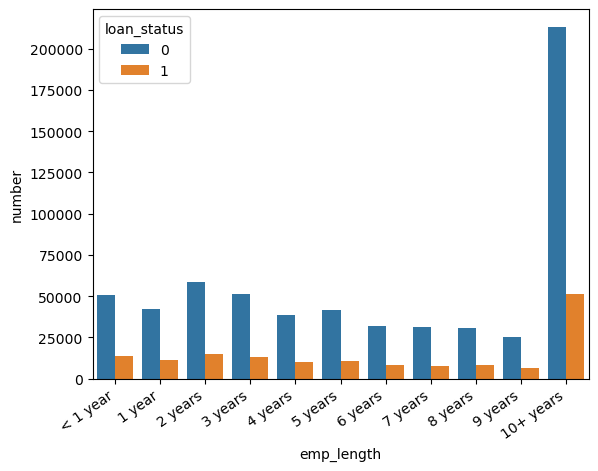

In [15]:
emplen_compare = df_unique_dropped.groupby(['loan_status','emp_length']).size().to_frame().reset_index()
emplen_compare.rename(columns={0:'number'}, inplace=True)
x_order = ['< 1 year','1 year','2 years','3 years','4 years',
          '5 years','6 years','7 years','8 years','9 years','10+ years']
sns.barplot(x='emp_length', y='number', hue='loan_status', data=emplen_compare, order=x_order)
plt.xticks(rotation=35, ha='right')
plt.show()

In [16]:
t1 = df_unique_dropped[df_unique_dropped['loan_status']==1]['emp_length'].to_frame()
print(t1['emp_length'].isnull().sum())

t2 = df_unique_dropped[df_unique_dropped['loan_status']==0]['emp_length'].to_frame()
print(t2['emp_length'].isnull().sum())

11873
30380


<span style="color:#009999">
The two subsets of classification labeled as 0 and 1 both have two identical peaks of customer volumes at the '2 years' and '10+ years'.<br>
The previous assumption looks like it has little value.<br>
</span>    

###  <font color=blue>Outliers process</font>

In [17]:
list_outliersCol = df_unique_dropped.select_dtypes([np.number]).columns
df_outliers = df_unique_dropped.copy()

list_outliersCol = df_unique_dropped.select_dtypes([np.number]).columns
df_outliers = df_unique_dropped.copy()

for col in list_outliersCol:
    q1,q3 = df_unique_dropped[col].quantile([0.25,0.75])
    iqr = q3-q1
    ceiling = q3+iqr*1.5
    floor = 0
    df_outliers[col] = [ceiling if x >= ceiling else x if x>0 else floor for x in df_unique_dropped[col]]
    
df_outliers.reset_index(drop=True, inplace=True)

###  <font color=blue>Drop columns and convert non-numeric to numeric</font>

<span style="color:#009999">
The next step is to check all the left columns one by one to decide if they will be dropped.<br>
Some of them, such as 'ID' and 'zip_code‘, are obviously discardable.<br>
This one by one check can be discussed and coorperated with some experienced business operators.
<br></span>

In [18]:
columns_todrop = ['id', 'emp_title', 'title', 'last_credit_pull_d', 'zip_code',
                'earliest_cr_line', 'collection_recovery_fee', 'debt_settlement_flag', 
                'last_pymnt_amnt', 'last_pymnt_d', 'recoveries', 
                 'total_pymnt', 'total_pymnt_inv', 'total_rec_int',
                'total_rec_late_fee', 'total_rec_prncp']

#df_dropbyobserv = df_unique_dropped.drop(columns_todrop, axis=1)
df_dropbyobserv = df_outliers.drop(columns_todrop, axis=1)

df_dropbyobserv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814986 entries, 0 to 814985
Data columns (total 71 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   814986 non-null  float64
 1   funded_amnt                 814986 non-null  float64
 2   funded_amnt_inv             814986 non-null  float64
 3   term                        814986 non-null  object 
 4   int_rate                    814986 non-null  float64
 5   installment                 814986 non-null  float64
 6   grade                       814986 non-null  object 
 7   sub_grade                   814986 non-null  object 
 8   emp_length                  772733 non-null  object 
 9   home_ownership              814986 non-null  object 
 10  annual_inc                  814986 non-null  float64
 11  verification_status         814986 non-null  object 
 12  issue_d                     814986 non-null  object 
 13  loan_status   

<span style="color:red">
It is a 814986 row * 71 columns table now.<br>
    <br></span>
<span style="color:#009999">
Then check all the non-numeric columns one by one.<br>
<br></span>

In [19]:
non_num_cols = [x for x in df_dropbyobserv.columns if (df_dropbyobserv[x].dtype == 'object')]
print("There are {} columns of non-numeric in the data now.".format(len(non_num_cols)))
print(non_num_cols)
print()
for col in non_num_cols:
    print(df_dropbyobserv[col].value_counts())
    print()

There are 12 columns of non-numeric in the data now.
['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'addr_state', 'initial_list_status', 'application_type', 'disbursement_method']

 36 months    618460
 60 months    196526
Name: term, dtype: int64

B    235225
C    225917
A    133475
D    127665
E     63559
F     23112
G      6033
Name: grade, dtype: int64

B3    51309
B4    51215
C1    50283
C2    47726
B5    47604
C3    44855
B2    44663
C4    43722
B1    40434
C5    39331
A5    38007
D1    32617
A4    31509
D2    28202
D3    24515
D4    23110
A1    22066
A3    21485
A2    20408
D5    19221
E1    16351
E2    14794
E3    12430
E4    10693
E5     9291
F1     7089
F2     5282
F3     4459
F4     3516
F5     2766
G1     1993
G2     1504
G3     1074
G4      809
G5      653
Name: sub_grade, dtype: int64

10+ years    264873
2 years       73493
3 years       64999
< 1 year      64572
1 year        53411
5 years       52149
4 years 

<span style="color:#009999">
['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'purpose', 'addr_state', 'initial_list_status', 'application_type', 'disbursement_method'] is the list of the left non-numeric columns. They need to be transformed into one-hot encoded or assigned to an integer sequence.<br>
<br>
Columns like 'term', 'initial_list_status', 'application_type' and 'disbursement_method' only have two values, so they can be simply converted to 0 or 1.
</span>

In [20]:
df1 = df_dropbyobserv.copy()

# Transform values in 'term', 'initial_list_status', 'application_type' and 'disbursement_method' to  0 or 1.
df1['term'] = pd.get_dummies(df_dropbyobserv['term'], drop_first=True)
df1['initial_list_status'] = pd.get_dummies(df_dropbyobserv['initial_list_status'], drop_first=True)
df1['application_type'] = pd.get_dummies(df_dropbyobserv['application_type'], drop_first=True)
df1['disbursement_method'] = pd.get_dummies(df_dropbyobserv['disbursement_method'], drop_first=True)
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
0,15000.0,15000.0,15000.0,1,12.39,336.64,C,C1,10+ years,RENT,78000.0,Source Verified,Dec-2014,0.0,debt_consolidation,VA,12.03,0.0,750.0,754.0,0.0,6.0,0.0,40286.5,29.0,17.0,1,684.0,680.0,0.0,0,0.0,0.0,149140.0,77772.5,5.0,29828.0,9525.0,4.7,0.0,0.0,103.0,244.0,1.0,1.0,0.0,47.0,0.0,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,196500.0,122008.0,10000.0,12000.0,0
1,10400.0,10400.0,10400.0,0,6.99,321.08,A,A3,8 years,MORTGAGE,58000.0,Not Verified,Dec-2014,0.0,credit_card,CA,14.92,0.0,710.0,714.0,2.0,17.0,0.0,6133.0,31.6,36.0,1,564.0,560.0,0.0,0,0.0,0.0,162110.0,19400.0,7.0,9536.0,7599.0,41.5,0.0,0.0,76.0,290.0,1.0,1.0,1.0,5.0,1.0,0.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,0.0,0.0,4.0,83.3,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,0
2,21425.0,21425.0,21425.0,1,15.59,516.36,D,D1,6 years,RENT,63800.0,Source Verified,Dec-2014,0.0,credit_card,MO,18.49,0.0,685.0,689.0,0.0,10.0,0.0,16374.0,76.2,35.0,1,704.0,700.0,0.0,0,0.0,0.0,42315.0,21500.0,4.0,4232.0,324.0,97.8,0.0,0.0,135.0,136.0,7.0,7.0,0.0,7.0,7.0,0.0,3.0,4.0,3.0,12.0,16.0,5.0,18.0,4.0,10.0,0.0,0.0,0.0,2.0,91.4,100.0,0.0,0.0,57073.0,42315.0,15000.0,35573.0,0
3,7650.0,7650.0,7650.0,0,13.66,260.20,C,C3,< 1 year,RENT,50000.0,Source Verified,Dec-2014,0.0,debt_consolidation,AZ,34.81,0.0,685.0,689.0,1.0,11.0,0.0,16822.0,91.9,20.0,0,559.0,555.0,0.0,0,0.0,0.0,64426.0,18300.0,6.0,5857.0,332.0,93.2,0.0,0.0,137.0,148.0,8.0,8.0,0.0,17.0,3.0,0.0,1.0,4.0,1.0,4.0,12.0,4.0,8.0,4.0,11.0,0.0,0.0,0.0,2.0,100.0,100.0,0.0,0.0,82331.0,64426.0,4900.0,64031.0,0
4,9600.0,9600.0,9600.0,0,13.66,326.53,C,C3,10+ years,RENT,69000.0,Source Verified,Dec-2014,0.0,debt_consolidation,NJ,25.81,0.0,680.0,684.0,0.0,12.0,0.0,16388.0,59.4,44.0,0,724.0,720.0,0.0,0,0.0,0.0,38566.0,27600.0,8.0,3214.0,6494.0,69.2,0.0,0.0,183.0,265.0,23.0,3.0,0.0,24.0,17.0,0.0,4.0,7.0,5.0,16.0,17.0,8.0,26.0,7.0,12.0,0.0,0.0,0.0,3.0,100.0,60.0,0.0,0.0,52490.0,38566.0,21100.0,24890.0,0


<span style="color:#009999">
After observation, the information in 'grade' has already been included in the 'sub_grade'.<br>
And each 'sub_grade' value consists of one letter and one digit, like 'A1','G5'. So, it can be transformed to an integer between 0 and 34.<br>
</span>

In [21]:
# Transform 'sub_grade' from categorical to float.
# And drop 'grade' since its information is involved in 'sub_grade'.

grade_dict = {'A':0.0, 'B':1.0, 'C':2.0, 'D':3.0, 'E':4.0, 'F':5.0, 'G':6.0}

def grade_to_float(s):
    t =int(s[1])
    return 5 * grade_dict[s[0]] + t - 1

df1['sub_grade'] = df_dropbyobserv['sub_grade'].apply(lambda s: grade_to_float(s))

df1.drop(labels=['grade'], axis=1, inplace=True)

df1.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
0,15000.0,15000.0,15000.0,1,12.39,336.64,10.0,10+ years,RENT,78000.0,Source Verified,Dec-2014,0.0,debt_consolidation,VA,12.03,0.0,750.0,754.0,0.0,6.0,0.0,40286.5,29.0,17.0,1,684.0,680.0,0.0,0,0.0,0.0,149140.0,77772.5,5.0,29828.0,9525.0,4.7,0.0,0.0,103.0,244.0,1.0,1.0,0.0,47.0,0.0,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,196500.0,122008.0,10000.0,12000.0,0
1,10400.0,10400.0,10400.0,0,6.99,321.08,2.0,8 years,MORTGAGE,58000.0,Not Verified,Dec-2014,0.0,credit_card,CA,14.92,0.0,710.0,714.0,2.0,17.0,0.0,6133.0,31.6,36.0,1,564.0,560.0,0.0,0,0.0,0.0,162110.0,19400.0,7.0,9536.0,7599.0,41.5,0.0,0.0,76.0,290.0,1.0,1.0,1.0,5.0,1.0,0.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,0.0,0.0,4.0,83.3,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,0
2,21425.0,21425.0,21425.0,1,15.59,516.36,15.0,6 years,RENT,63800.0,Source Verified,Dec-2014,0.0,credit_card,MO,18.49,0.0,685.0,689.0,0.0,10.0,0.0,16374.0,76.2,35.0,1,704.0,700.0,0.0,0,0.0,0.0,42315.0,21500.0,4.0,4232.0,324.0,97.8,0.0,0.0,135.0,136.0,7.0,7.0,0.0,7.0,7.0,0.0,3.0,4.0,3.0,12.0,16.0,5.0,18.0,4.0,10.0,0.0,0.0,0.0,2.0,91.4,100.0,0.0,0.0,57073.0,42315.0,15000.0,35573.0,0
3,7650.0,7650.0,7650.0,0,13.66,260.20,12.0,< 1 year,RENT,50000.0,Source Verified,Dec-2014,0.0,debt_consolidation,AZ,34.81,0.0,685.0,689.0,1.0,11.0,0.0,16822.0,91.9,20.0,0,559.0,555.0,0.0,0,0.0,0.0,64426.0,18300.0,6.0,5857.0,332.0,93.2,0.0,0.0,137.0,148.0,8.0,8.0,0.0,17.0,3.0,0.0,1.0,4.0,1.0,4.0,12.0,4.0,8.0,4.0,11.0,0.0,0.0,0.0,2.0,100.0,100.0,0.0,0.0,82331.0,64426.0,4900.0,64031.0,0
4,9600.0,9600.0,9600.0,0,13.66,326.53,12.0,10+ years,RENT,69000.0,Source Verified,Dec-2014,0.0,debt_consolidation,NJ,25.81,0.0,680.0,684.0,0.0,12.0,0.0,16388.0,59.4,44.0,0,724.0,720.0,0.0,0,0.0,0.0,38566.0,27600.0,8.0,3214.0,6494.0,69.2,0.0,0.0,183.0,265.0,23.0,3.0,0.0,24.0,17.0,0.0,4.0,7.0,5.0,16.0,17.0,8.0,26.0,7.0,12.0,0.0,0.0,0.0,3.0,100.0,60.0,0.0,0.0,52490.0,38566.0,21100.0,24890.0,0
5,2500.0,2500.0,2500.0,0,11.99,83.03,9.0,< 1 year,MORTGAGE,89000.0,Source Verified,Dec-2014,0.0,home_improvement,MN,13.77,0.0,685.0,689.0,1.0,9.0,0.0,22908.0,94.3,32.0,0,769.0,765.0,0.0,0,0.0,0.0,397223.0,24300.0,6.0,42389.0,1333.0,86.4,0.0,0.0,158.0,148.0,24.0,6.0,5.0,24.0,2.0,0.0,3.0,4.0,3.0,6.0,17.0,4.0,10.0,4.0,9.0,0.0,0.0,0.0,1.0,96.8,66.7,0.0,0.0,415290.0,61606.0,9800.0,47946.0,0
6,16000.0,16000.0,16000.0,1,11.44,351.40,8.0,6 years,OWN,109777.0,Verified,Dec-2014,0.0,debt_consolidation,VA,11.63,0.0,700.0,704.0,0.0,7.0,0.0,7253.0,60.4,14.0,1,669.0,665.0,0.0,0,0.0,0.0,373743.0,12000.0,3.0,42389.0,2559.0,72.2,0.0,0.0,121.0,133.0,17.0,17.0,2.0,61.0,17.0,0.0,2.0,3.0,3.0,6.0,2.0,5.0,10.0,3.0,7.0,0.0,0.0,0.0,0.0,71.4,66.7,0.0,0.0,428032.0,34475.0,9200.0,33000.0,0
7,23325.0,23325.0,23325.0,0,14.31,800.71,13.0,10+ years,RENT,72000.0,Source Verified,Dec-2014,0.0,credit_card,WA,27.03,0.0,665.0,669.0,0.0,14.0,0.0,32372.0,82.2,23.0,0,499.0,0.0,0.0,0,0.0,0.0,393558.0,39400.0,6.0,39356.0,3977.0,89.0,0.0,0.0,132.0,194.0,15.0,

<span style="color:#009999">
Values in 'emp_length' have an obvious way to be converted to an integer.
<br></span>

In [22]:
# Transform 'emp_length' from categorical to float.
emplength_dict = {'< 1 year ':0.0, 
                  '1 year':1.0, 
                  '2 years':2.0, 
                  '3 years':3.0,
                  '4 yearsE':4.0, 
                  '5 years':5.0,
                  '6 years':6.0,
                  '7 years':7.0, 
                  '8 years':8.0,
                  '9 years':9.0, 
                  '10+ years':10.0,
                 }

df1['emp_length'] = df_dropbyobserv['emp_length'].map(emplength_dict)
df1.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
0,15000.0,15000.0,15000.0,1,12.39,336.64,10.0,10.0,RENT,78000.0,Source Verified,Dec-2014,0.0,debt_consolidation,VA,12.03,0.0,750.0,754.0,0.0,6.0,0.0,40286.5,29.0,17.0,1,684.0,680.0,0.0,0,0.0,0.0,149140.0,77772.5,5.0,29828.0,9525.0,4.7,0.0,0.0,103.0,244.0,1.0,1.0,0.0,47.0,0.0,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,196500.0,122008.0,10000.0,12000.0,0
1,10400.0,10400.0,10400.0,0,6.99,321.08,2.0,8.0,MORTGAGE,58000.0,Not Verified,Dec-2014,0.0,credit_card,CA,14.92,0.0,710.0,714.0,2.0,17.0,0.0,6133.0,31.6,36.0,1,564.0,560.0,0.0,0,0.0,0.0,162110.0,19400.0,7.0,9536.0,7599.0,41.5,0.0,0.0,76.0,290.0,1.0,1.0,1.0,5.0,1.0,0.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,0.0,0.0,4.0,83.3,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,0
2,21425.0,21425.0,21425.0,1,15.59,516.36,15.0,6.0,RENT,63800.0,Source Verified,Dec-2014,0.0,credit_card,MO,18.49,0.0,685.0,689.0,0.0,10.0,0.0,16374.0,76.2,35.0,1,704.0,700.0,0.0,0,0.0,0.0,42315.0,21500.0,4.0,4232.0,324.0,97.8,0.0,0.0,135.0,136.0,7.0,7.0,0.0,7.0,7.0,0.0,3.0,4.0,3.0,12.0,16.0,5.0,18.0,4.0,10.0,0.0,0.0,0.0,2.0,91.4,100.0,0.0,0.0,57073.0,42315.0,15000.0,35573.0,0
3,7650.0,7650.0,7650.0,0,13.66,260.20,12.0,NaN,RENT,50000.0,Source Verified,Dec-2014,0.0,debt_consolidation,AZ,34.81,0.0,685.0,689.0,1.0,11.0,0.0,16822.0,91.9,20.0,0,559.0,555.0,0.0,0,0.0,0.0,64426.0,18300.0,6.0,5857.0,332.0,93.2,0.0,0.0,137.0,148.0,8.0,8.0,0.0,17.0,3.0,0.0,1.0,4.0,1.0,4.0,12.0,4.0,8.0,4.0,11.0,0.0,0.0,0.0,2.0,100.0,100.0,0.0,0.0,82331.0,64426.0,4900.0,64031.0,0
4,9600.0,9600.0,9600.0,0,13.66,326.53,12.0,10.0,RENT,69000.0,Source Verified,Dec-2014,0.0,debt_consolidation,NJ,25.81,0.0,680.0,684.0,0.0,12.0,0.0,16388.0,59.4,44.0,0,724.0,720.0,0.0,0,0.0,0.0,38566.0,27600.0,8.0,3214.0,6494.0,69.2,0.0,0.0,183.0,265.0,23.0,3.0,0.0,24.0,17.0,0.0,4.0,7.0,5.0,16.0,17.0,8.0,26.0,7.0,12.0,0.0,0.0,0.0,3.0,100.0,60.0,0.0,0.0,52490.0,38566.0,21100.0,24890.0,0
5,2500.0,2500.0,2500.0,0,11.99,83.03,9.0,NaN,MORTGAGE,89000.0,Source Verified,Dec-2014,0.0,home_improvement,MN,13.77,0.0,685.0,689.0,1.0,9.0,0.0,22908.0,94.3,32.0,0,769.0,765.0,0.0,0,0.0,0.0,397223.0,24300.0,6.0,42389.0,1333.0,86.4,0.0,0.0,158.0,148.0,24.0,6.0,5.0,24.0,2.0,0.0,3.0,4.0,3.0,6.0,17.0,4.0,10.0,4.0,9.0,0.0,0.0,0.0,1.0,96.8,66.7,0.0,0.0,415290.0,61606.0,9800.0,47946.0,0
6,16000.0,16000.0,16000.0,1,11.44,351.40,8.0,6.0,OWN,109777.0,Verified,Dec-2014,0.0,debt_consolidation,VA,11.63,0.0,700.0,704.0,0.0,7.0,0.0,7253.0,60.4,14.0,1,669.0,665.0,0.0,0,0.0,0.0,373743.0,12000.0,3.0,42389.0,2559.0,72.2,0.0,0.0,121.0,133.0,17.0,17.0,2.0,61.0,17.0,0.0,2.0,3.0,3.0,6.0,2.0,5.0,10.0,3.0,7.0,0.0,0.0,0.0,0.0,71.4,66.7,0.0,0.0,428032.0,34475.0,9200.0,33000.0,0
7,23325.0,23325.0,23325.0,0,14.31,800.71,13.0,10.0,RENT,72000.0,Source Verified,Dec-2014,0.0,credit_card,WA,27.03,0.0,665.0,669.0,0.0,14.0,0.0,32372.0,82.2,23.0,0,499.0,0.0,0.0,0,0.0,0.0,393558.0,39400.0,6.0,39356.0,3977.0,89.0,0.0,0.0,132.0,194.0,15.0,12.0,6.0,23.0,16.0,0.0,3.0,5.0,7.0,9.

<span style="color:#009999">
If a categorical column contains values more than 2, converting it to dummies will expand columns size that increases computing complexity.<br>
Converting it to an interger sequence is also difficult since the order of the sequence implies a linear correlation relationship with the classification labels.<br></span>
<span style="color:red">
For binary classification problems, I propose an idea here: the ordered integers assigned to a categorical values column can be set according to the classification label rates of the subsets with specified categorical values.
<br></span>
<span style="color:#009999">
For example, in this case, the rates of entries of 'labelled as 1' in 'loan_status' with different values of 'purpose' are as follows:<br>{'NONE': 0.15217391304347827, <br>
    'ANY': 0.1702127659574468, <br>
    'MORTGAGE': 0.17780792693417488, <br>
    'OTHER': 0.1875, <br>
    'OWN': 0.21580378179182022, <br>
    'RENT': 0.2394215417554934}<br>
The ordered intergers will be like these:<br>
    {'NONE': 0, <br>
    'ANY': 1, <br>
    'MORTGAGE': 2,<br>
    'OTHER': 3, <br>
    'OWN': 4,<br>
    'RENT': 5}   
<br></span>

In [23]:
# The columns need to be converted to ordered integers.
non_num_cols = ['home_ownership','verification_status','purpose']

# define a function to get a dict to map categorical values to ordered integers
# parameters:
# df_date: the dataframe 
# cols_totrans: the name of column will be converted
# col_target: the column name of classification label
def transdic_by_defrate(df_date, cols_totrans, col_target):
    cate_defrate = df_date.groupby(cols_totrans)[col_target].mean().sort_values()
    trans_dict={}
    order = 0
    for i in cate_defrate.index:
        trans_dict[i] = order
        order = order+1
    return (trans_dict)

# convert the columns in non_num_cols list one by one
for col in non_num_cols:
    t = transdic_by_defrate(df1, col, 'loan_status')
    print(t)
    df1[col] = df_dropbyobserv[col].map(t)

df1.head(10)

{'ANY': 0, 'MORTGAGE': 1, 'NONE': 2, 'OTHER': 3, 'OWN': 4, 'RENT': 5}
{'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}
{'car': 0, 'credit_card': 1, 'debt_consolidation': 2, 'educational': 3, 'home_improvement': 4, 'house': 5, 'major_purchase': 6, 'medical': 7, 'moving': 8, 'other': 9, 'renewable_energy': 10, 'small_business': 11, 'vacation': 12, 'wedding': 13}


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
0,15000.0,15000.0,15000.0,1,12.39,336.64,10.0,10.0,5,78000.0,1,Dec-2014,0.0,2,VA,12.03,0.0,750.0,754.0,0.0,6.0,0.0,40286.5,29.0,17.0,1,684.0,680.0,0.0,0,0.0,0.0,149140.0,77772.5,5.0,29828.0,9525.0,4.7,0.0,0.0,103.0,244.0,1.0,1.0,0.0,47.0,0.0,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,196500.0,122008.0,10000.0,12000.0,0
1,10400.0,10400.0,10400.0,0,6.99,321.08,2.0,8.0,1,58000.0,0,Dec-2014,0.0,1,CA,14.92,0.0,710.0,714.0,2.0,17.0,0.0,6133.0,31.6,36.0,1,564.0,560.0,0.0,0,0.0,0.0,162110.0,19400.0,7.0,9536.0,7599.0,41.5,0.0,0.0,76.0,290.0,1.0,1.0,1.0,5.0,1.0,0.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,0.0,0.0,4.0,83.3,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,0
2,21425.0,21425.0,21425.0,1,15.59,516.36,15.0,6.0,5,63800.0,1,Dec-2014,0.0,1,MO,18.49,0.0,685.0,689.0,0.0,10.0,0.0,16374.0,76.2,35.0,1,704.0,700.0,0.0,0,0.0,0.0,42315.0,21500.0,4.0,4232.0,324.0,97.8,0.0,0.0,135.0,136.0,7.0,7.0,0.0,7.0,7.0,0.0,3.0,4.0,3.0,12.0,16.0,5.0,18.0,4.0,10.0,0.0,0.0,0.0,2.0,91.4,100.0,0.0,0.0,57073.0,42315.0,15000.0,35573.0,0
3,7650.0,7650.0,7650.0,0,13.66,260.20,12.0,NaN,5,50000.0,1,Dec-2014,0.0,2,AZ,34.81,0.0,685.0,689.0,1.0,11.0,0.0,16822.0,91.9,20.0,0,559.0,555.0,0.0,0,0.0,0.0,64426.0,18300.0,6.0,5857.0,332.0,93.2,0.0,0.0,137.0,148.0,8.0,8.0,0.0,17.0,3.0,0.0,1.0,4.0,1.0,4.0,12.0,4.0,8.0,4.0,11.0,0.0,0.0,0.0,2.0,100.0,100.0,0.0,0.0,82331.0,64426.0,4900.0,64031.0,0
4,9600.0,9600.0,9600.0,0,13.66,326.53,12.0,10.0,5,69000.0,1,Dec-2014,0.0,2,NJ,25.81,0.0,680.0,684.0,0.0,12.0,0.0,16388.0,59.4,44.0,0,724.0,720.0,0.0,0,0.0,0.0,38566.0,27600.0,8.0,3214.0,6494.0,69.2,0.0,0.0,183.0,265.0,23.0,3.0,0.0,24.0,17.0,0.0,4.0,7.0,5.0,16.0,17.0,8.0,26.0,7.0,12.0,0.0,0.0,0.0,3.0,100.0,60.0,0.0,0.0,52490.0,38566.0,21100.0,24890.0,0
5,2500.0,2500.0,2500.0,0,11.99,83.03,9.0,NaN,1,89000.0,1,Dec-2014,0.0,4,MN,13.77,0.0,685.0,689.0,1.0,9.0,0.0,22908.0,94.3,32.0,0,769.0,765.0,0.0,0,0.0,0.0,397223.0,24300.0,6.0,42389.0,1333.0,86.4,0.0,0.0,158.0,148.0,24.0,6.0,5.0,24.0,2.0,0.0,3.0,4.0,3.0,6.0,17.0,4.0,10.0,4.0,9.0,0.0,0.0,0.0,1.0,96.8,66.7,0.0,0.0,415290.0,61606.0,9800.0,47946.0,0
6,16000.0,16000.0,16000.0,1,11.44,351.40,8.0,6.0,4,109777.0,2,Dec-2014,0.0,2,VA,11.63,0.0,700.0,704.0,0.0,7.0,0.0,7253.0,60.4,14.0,1,669.0,665.0,0.0,0,0.0,0.0,373743.0,12000.0,3.0,42389.0,2559.0,72.2,0.0,0.0,121.0,133.0,17.0,17.0,2.0,61.0,17.0,0.0,2.0,3.0,3.0,6.0,2.0,5.0,10.0,3.0,7.0,0.0,0.0,0.0,0.0,71.4,66.7,0.0,0.0,428032.0,34475.0,9200.0,33000.0,0
7,23325.0,23325.0,23325.0,0,14.31,800.71,13.0,10.0,5,72000.0,1,Dec-2014,0.0,1,WA,27.03,0.0,665.0,669.0,0.0,14.0,0.0,32372.0,82.2,23.0,0,499.0,0.0,0.0,0,0.0,0.0,393558.0,39400.0,6.0,39356.0,3977.0,89.0,0.0,0.0,132.0,194.0,15.0,12.0,6.0,23.0,16.0,0.0,3.0,5.0,7.0,9.0,4.0,10.0,13.0,5.0,14.0,0.0,0.0,0.0,1.0,95.7,66.7,0.0,0.0,443889.0,79490.0,36000.0,78126.0,0
8,5250.0,5250.0,5250.0,0,11.44,172.98,8.0,2.0,5,26000.0,0,Dec-2014,0.0,2,MD,14.36,0.0,745.0,749.0,0.0,8.0,0.0,4448.0,20.2,13.0,0,764.0,760.0,0.0,0,0.0,0

<span style="color:#009999">
The 'issue_d' column shows the dates of all the entries. It may be useless to predict if a new customer will default or not, so it will be discarded. <br>
The 'addr_state' may contain some information related to the final 'loan_status'. But it may be an ethical discrimination issue. I will make some analysis, but drop it in the late process.
</span>

In [24]:
from IPython.core.display import HTML
import plotly.offline as offline
import plotly.graph_objects as go
offline.init_notebook_mode(connected=True)

#Calculate the average default rates with respect to states.
t1 = df1.groupby(['addr_state'])['loan_status'].mean().reset_index()

fig = go.Figure(data = go.Choropleth(
    locations=t1['addr_state'],
    z=t1['loan_status'],
    locationmode='USA-states',
    colorscale='Reds',
    colorbar_title="Default Rate",
    hovertext=t1['addr_state'],
))

fig.update_layout(
    geo_scope = 'usa'
)

fig.write_html('index.html')
offline.iplot(fig)

In [24]:
# Now, get a dataframe with only numeric columns.
df_num = df1.drop(['issue_d','addr_state'], axis=1)
df_num.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,disbursement_method
0,15000.0,15000.0,15000.0,1,12.39,336.64,10.0,10.0,5,78000.0,1,0,9,12.03,0.0,750.0,754.0,0.0,6.0,0.0,138008.0,29.0,17.0,1,684.0,680.0,0.0,0,0.0,0.0,149140.0,184500.0,5.0,29828.0,9525.0,4.7,0.0,0.0,103.0,244.0,1.0,1.0,0.0,47.0,NaN,0.0,1.0,4.0,1.0,2.0,8.0,5.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,100.0,0.0,0.0,0.0,196500.0,149140.0,10000.0,12000.0,0
1,10400.0,10400.0,10400.0,0,6.99,321.08,2.0,8.0,2,58000.0,0,1,3,14.92,0.0,710.0,714.0,2.0,17.0,0.0,6133.0,31.6,36.0,1,564.0,560.0,0.0,0,0.0,0.0,162110.0,19400.0,7.0,9536.0,7599.0,41.5,0.0,0.0,76.0,290.0,1.0,1.0,1.0,5.0,1.0,4.0,6.0,9.0,7.0,18.0,2.0,14.0,32.0,9.0,17.0,0.0,0.0,0.0,4.0,83.3,14.3,0.0,0.0,179407.0,15030.0,13000.0,11325.0,0
2,21425.0,21425.0,21425.0,1,15.59,516.36,15.0,6.0,5,63800.0,1,0,3,18.49,0.0,685.0,689.0,0.0,10.0,0.0,16374.0,76.2,35.0,1,704.0,700.0,0.0,0,0.0,0.0,42315.0,21500.0,4.0,4232.0,324.0,97.8,0.0,0.0,135.0,136.0,7.0,7.0,0.0,7.0,7.0,1.0,3.0,4.0,3.0,12.0,16.0,5.0,18.0,4.0,10.0,0.0,0.0,0.0,2.0,91.4,100.0,0.0,0.0,57073.0,42315.0,15000.0,35573.0,0
4,7650.0,7650.0,7650.0,0,13.66,260.20,12.0,NaN,5,50000.0,1,1,9,34.81,0.0,685.0,689.0,1.0,11.0,0.0,16822.0,91.9,20.0,0,559.0,555.0,0.0,0,0.0,0.0,64426.0,18300.0,6.0,5857.0,332.0,93.2,0.0,0.0,137.0,148.0,8.0,8.0,0.0,17.0,3.0,0.0,1.0,4.0,1.0,4.0,12.0,4.0,8.0,4.0,11.0,0.0,0.0,0.0,2.0,100.0,100.0,0.0,0.0,82331.0,64426.0,4900.0,64031.0,0
5,9600.0,9600.0,9600.0,0,13.66,326.53,12.0,10.0,5,69000.0,1,0,9,25.81,0.0,680.0,684.0,0.0,12.0,0.0,16388.0,59.4,44.0,0,724.0,720.0,0.0,0,0.0,0.0,38566.0,27600.0,8.0,3214.0,6494.0,69.2,0.0,0.0,183.0,265.0,23.0,3.0,0.0,24.0,17.0,0.0,4.0,7.0,5.0,16.0,17.0,8.0,26.0,7.0,12.0,0.0,0.0,0.0,3.0,100.0,60.0,0.0,0.0,52490.0,38566.0,21100.0,24890.0,0
6,2500.0,2500.0,2500.0,0,11.99,83.03,9.0,NaN,2,89000.0,1,0,4,13.77,0.0,685.0,689.0,1.0,9.0,0.0,22908.0,94.3,32.0,0,769.0,765.0,0.0,0,0.0,0.0,397223.0,24300.0,6.0,44136.0,1333.0,86.4,0.0,0.0,158.0,148.0,24.0,6.0,5.0,24.0,2.0,0.0,3.0,4.0,3.0,6.0,17.0,4.0,10.0,4.0,9.0,0.0,0.0,0.0,1.0,96.8,66.7,0.0,0.0,415290.0,61606.0,9800.0,47946.0,0
7,16000.0,16000.0,16000.0,1,11.44,351.40,8.0,6.0,4,109777.0,2,0,9,11.63,1.0,700.0,704.0,0.0,7.0,0.0,7253.0,60.4,14.0,1,669.0,665.0,0.0,0,0.0,0.0,373743.0,12000.0,3.0,53392.0,2559.0,72.2,0.0,0.0,121.0,133.0,17.0,17.0,2.0,80.0,17.0,0.0,2.0,3.0,3.0,6.0,2.0,5.0,10.0,3.0,7.0,0.0,0.0,0.0,0.0,71.4,66.7,0.0,0.0,428032.0,34475.0,9200.0,33000.0,0
8,23325.0,23325.0,23325.0,0,14.31,800.71,13.0,10.0,5,72000.0,1,1,3,27.03,1.0,665.0,669.0,0.0,14.0,0.0,32372.0,82.2,23.0,0,499.0,0.0,0.0,0,0.0,0.0,393558.0,39400.0,6.0,39356.0,3977.0,89.0,0.0,0.0,132.0,194.0,15.0,12.0,6.0,23.0,16.0,0.0,3.0,5.0,7.0,9.0,4.0,10.0,13.0,5.0,14.0,0.0,0.0,0.0,1.0,95.7,66.7,0.0,0.0,443889.0,79490.0,36000.0,78126.0,0
9,5250.0,5250.0,5250.0,0,11.44,172.98,8.0,2.0,5,26000.0,0,0,9,14.36,0.0,745.0,749.0,0.0,8.0,0.0,4448.0,20.2,13.0,0,764.0,760.0,0.0,0,0.0,0.0,10133.0,22000.0,4.0,1267.0,12152.0,26.8,0.0,0.0,33.0,67.0,12.0,6.0,0.0,16.0,NaN,0.0,2.0,2.0,3.0,4.0,3.0,6.0,9.0,2.0,8.0,0.0,0.0,0.0,2.0,100.

In [25]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814986 entries, 0 to 1646792
Data columns (total 68 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   814986 non-null  float64
 1   funded_amnt                 814986 non-null  float64
 2   funded_amnt_inv             814986 non-null  float64
 3   term                        814986 non-null  uint8  
 4   int_rate                    814986 non-null  float64
 5   installment                 814986 non-null  float64
 6   sub_grade                   814986 non-null  float64
 7   emp_length                  659409 non-null  float64
 8   home_ownership              814986 non-null  int64  
 9   annual_inc                  814986 non-null  float64
 10  verification_status         814986 non-null  int64  
 11  loan_status                 814986 non-null  int64  
 12  purpose                     814986 non-null  int64  
 13  dti          

<span style="color:red">
It is a 814986 rows * 68 columns table now.<br>
</span>

<span style="color:#009999">
Fill all the null cells with the 'bfill' method.<br>
Fill by RandomForest can be considered with the permission of time and resources.
</span>

In [26]:
df_filled_num = df_num.fillna(method='bfill')
df_filled_num.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
last_fico_range_high          0
last_fico_range_low           0
collections_12_mths_ex_med    0
application_type              0
acc_now_delinq                0
tot_coll_amt                  0
tot_cur_bal                   0
total_re

##  <font color=blue>Phase 2: Explore possible relationships</font>

In correlation profiling, although many attributes are categorical values, the calculation of linear correlation coefficients still makes sense because some linear integer sequences are used for assignment transformations.The results can also be compared with the output of the 'plot_importance'.

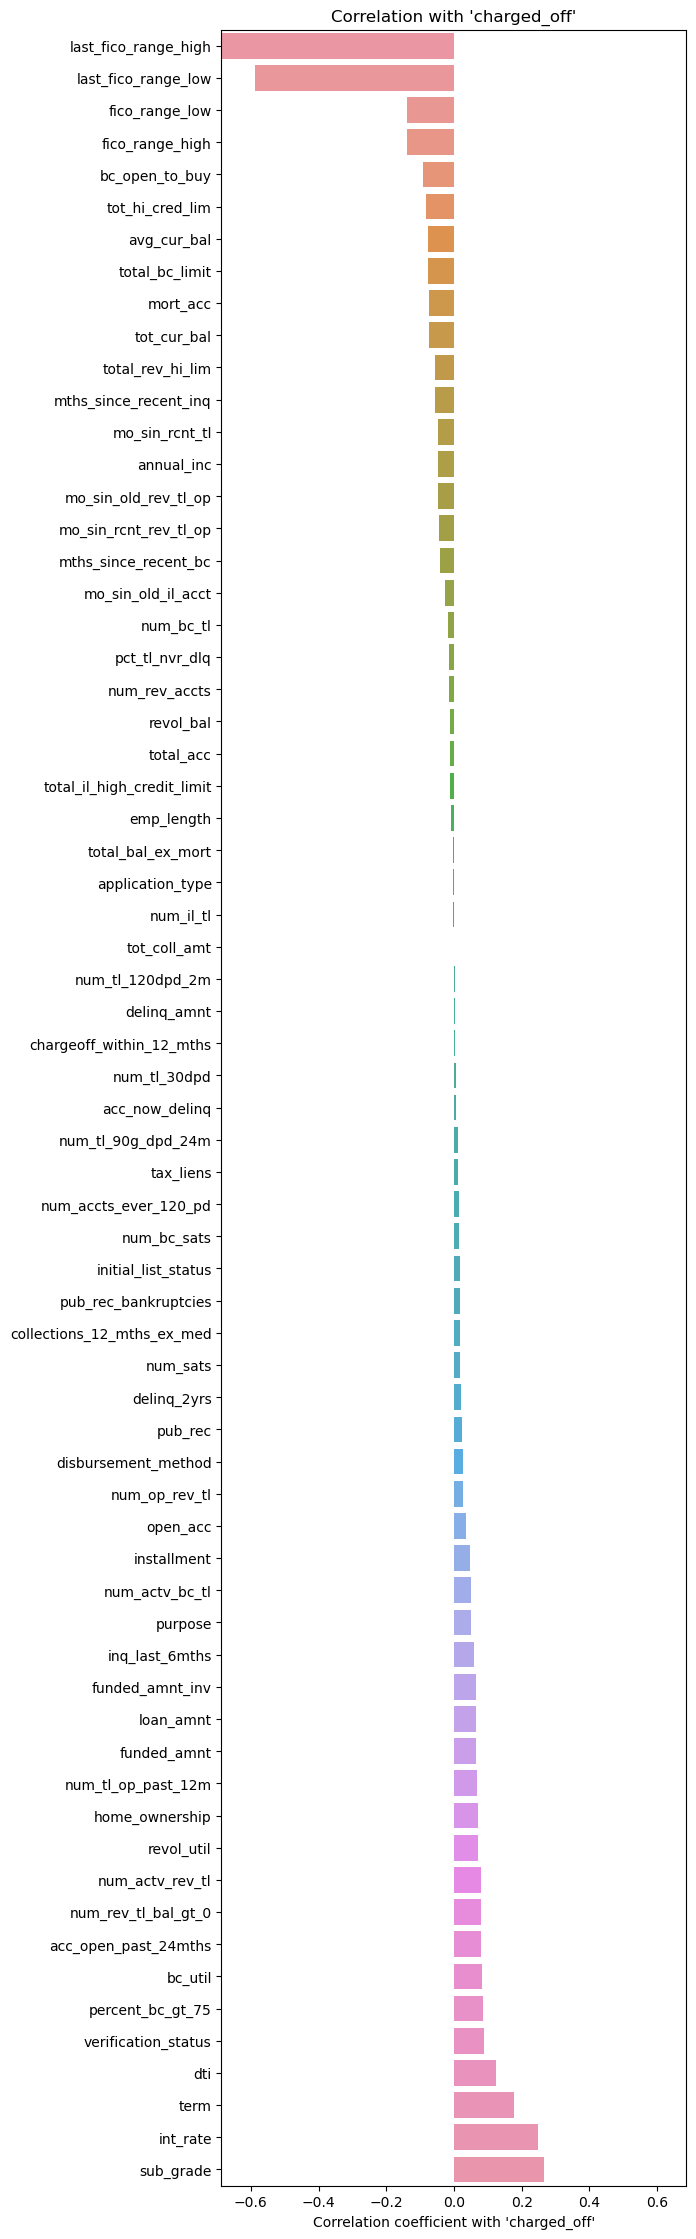

In [27]:
corr_charged_off = df_filled_num.corr()['loan_status']
corr_charged_off.drop(labels='loan_status', inplace=True)
corr_charged_off = corr_charged_off.sort_values()
plt.figure(figsize=(6,28))
sns.barplot(y=corr_charged_off.index, x=corr_charged_off.values, orient='h')
plt.title("Correlation with 'charged_off'")
plt.xlabel("Correlation coefficient with 'charged_off'")
xmax = np.abs(corr_charged_off).max()
plt.xlim([-xmax, xmax])
plt.show()

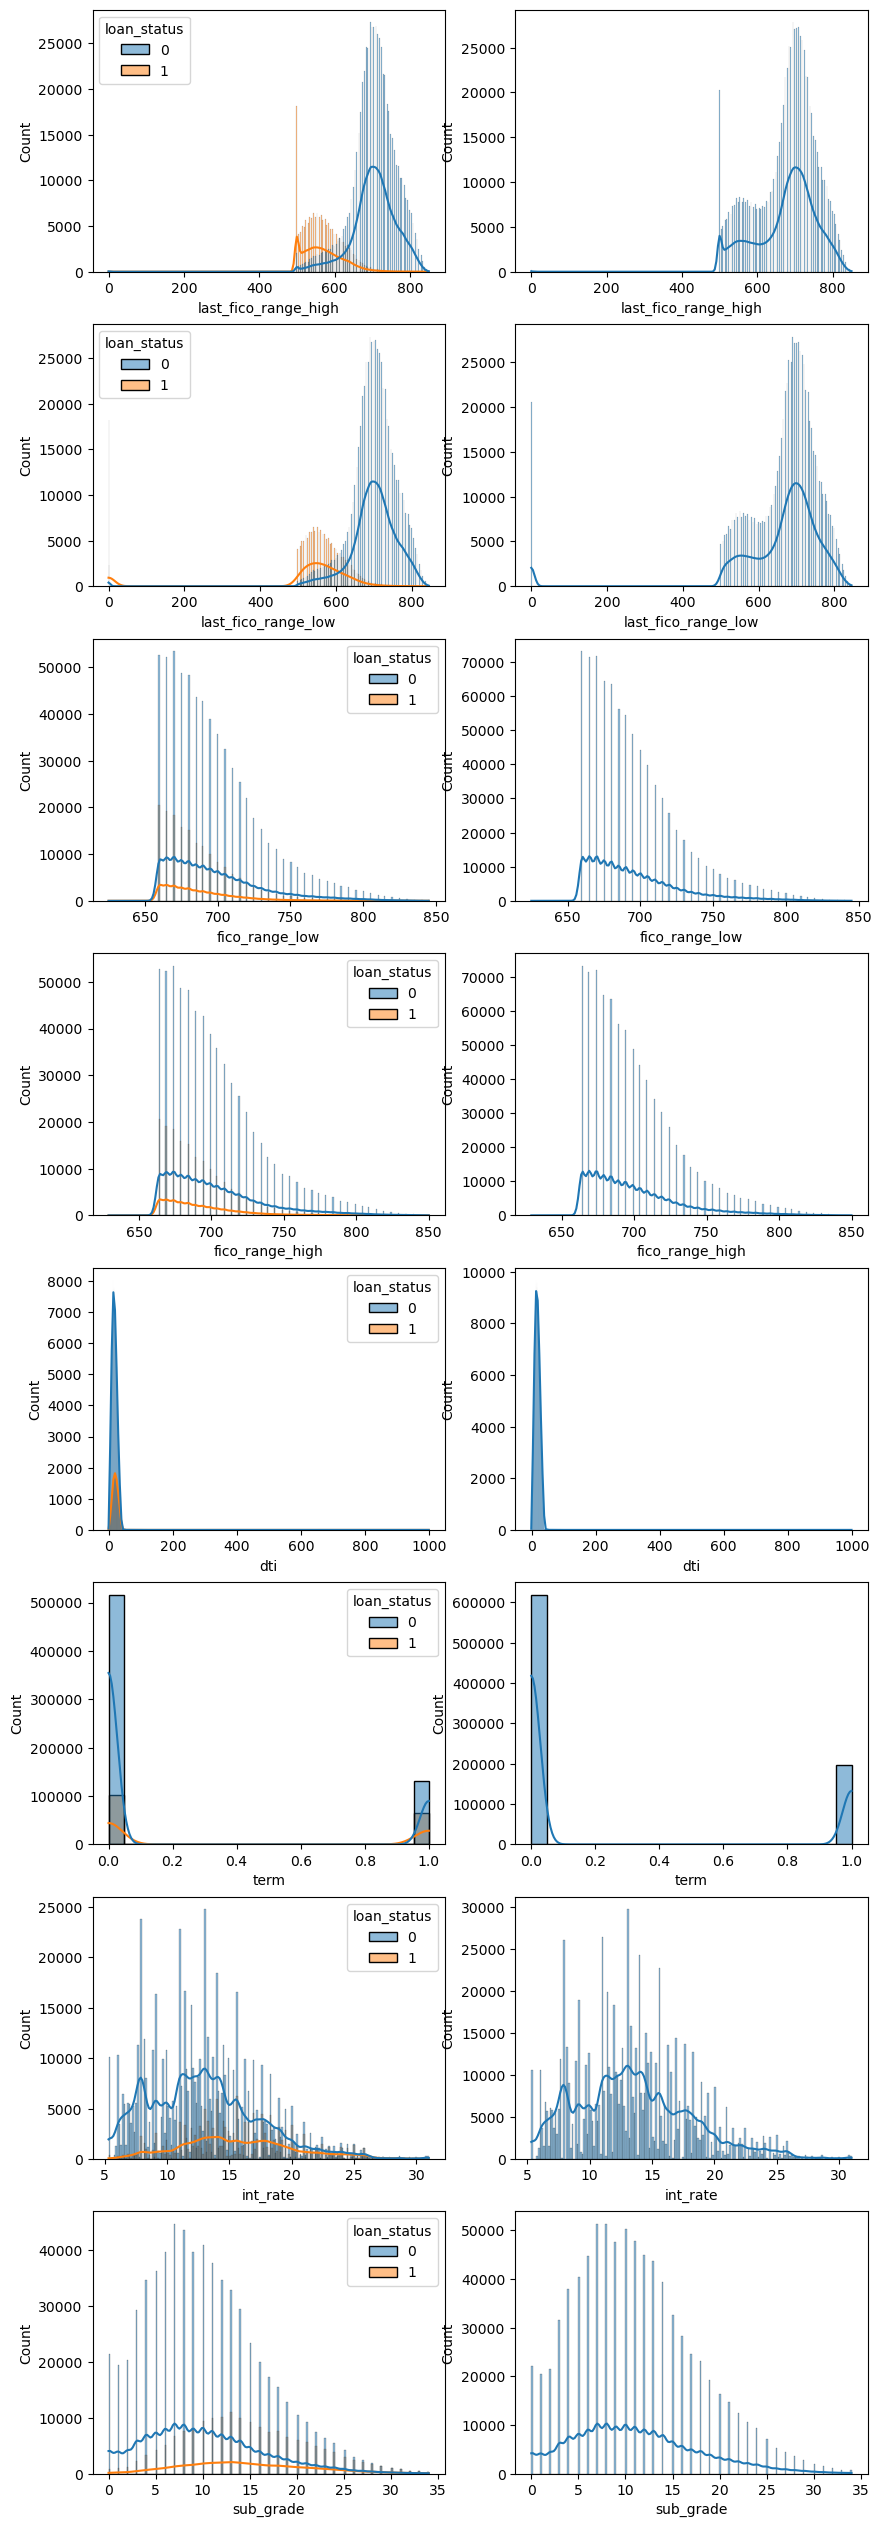

In [28]:
# to show the distribution of some of selected columns distributions as a whole or grouped by 'loan_status' labels.
target_col = ['last_fico_range_high', 'last_fico_range_low', 'fico_range_low', 'fico_range_high',
              'dti', 'term', 'int_rate', 'sub_grade']

len_targ=len(target_col)

fig,axes = plt.subplots(len_targ,2,figsize=(10,4*len_targ))

for i,name in enumerate(target_col):
    sns.histplot(x=name, data=df_filled_num, hue='loan_status', kde=True, ax=axes[i][0])
    sns.histplot(x=name, data=df_filled_num, kde=True, ax=axes[i][1])

<font color=red>There are clear differences in the distributions of defaulting and non-defaulting users on 'last_fico_range_high', 'last_fico_range_low','int_rate ' and 'sub_grade' columns.<br>
If feature engineering is needed, all the columns may be plotted, examined, and discussed one by one.<br>
Due to space limitations, only a small part is shown here.<br>
</font>

##  <font color=blue>Phase 3: Re-scale and Split</font>

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

y = df_filled_num['loan_status']
X0 = df_filled_num.drop(['loan_status'],axis=1)

scaler = MinMaxScaler() 
scaler = scaler.fit(X0)
X = scaler.transform(X0)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42 )
print("df.shape:",df_filled_num.shape)
print("X_train:",X_train.shape)
print("y_train:",y_train.shape)
print("X_test:",X_test.shape)
print("y_test:",y_test.shape)

df.shape: (814986, 68)
X_train: (651988, 67)
y_train: (651988,)
X_test: (162998, 67)
y_test: (162998,)


## <font color=blue>Phase 4: Model training, metrics comparison, and GridSearch</font>

In [30]:
# define a function to get the most frequently used metrics
# parameters:
# y: the actual y of test set 
# y_pred: the predicted y from mode
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, \
                            confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

def res_output(y, y_pred, wid=6, heit=4):
    print('Confusion Matrix:')
    print(confusion_matrix(y, y_pred),'\n')
    print('Accaracy:{:0.4%}'.format(accuracy_score(y, y_pred)))
    print('Precsion:{:0.4%}'.format(precision_score(y, y_pred)))
    print('Recall:{:0.4%}'.format(recall_score(y, y_pred)))
    print('F1:{:0.4%}'.format(f1_score(y, y_pred)))
    print('AUC:{:0.4%}'.format(roc_auc_score(y, y_pred)))
    fpr, tpr, threshould = roc_curve(y, y_pred)
    plt.figure(figsize=(wid,heit))
    plt.plot(fpr,tpr,'b')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('TPR')
    plt.xlabel('FTR')
    plt.show()

Confusion Matrix:
[[123146   6068]
 [  8490  25294]] 

Accaracy:91.0686%
Precsion:80.6517%
Recall:74.8698%
F1:77.6533%
AUC:85.0868%


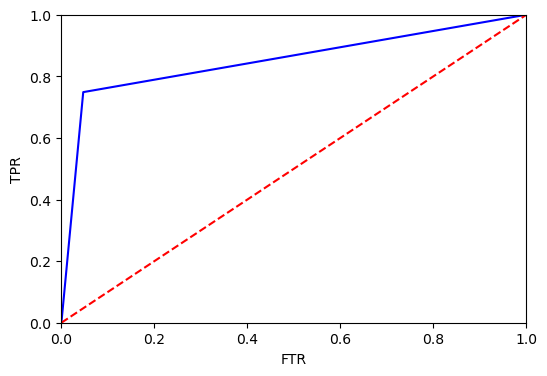

Runtime = 0:00:28.179625


In [31]:
# logistics regression
from sklearn.linear_model import LogisticRegression
import datetime

lrmodel=LogisticRegression(solver='liblinear')  

start=datetime.datetime.now()
lrmodel.fit(X_train,y_train)  
end=datetime.datetime.now()

y_lrpred=lrmodel.predict(X_test) 

res_output(y_test, y_lrpred)  
print('Runtime =',end-start) 

Confusion Matrix:
[[122041   7173]
 [  6730  27054]] 

Accaracy:91.4704%
Precsion:79.0429%
Recall:80.0793%
F1:79.5577%
AUC:87.2640%


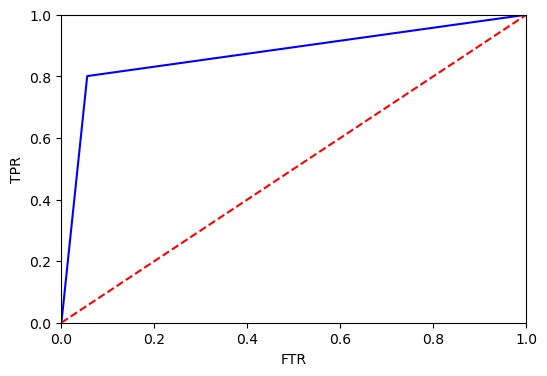

Runtime = 0:08:23.561689


In [32]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

rfmodel=RandomForestClassifier()

start=datetime.datetime.now()
rfmodel.fit(X_train, y_train)
end=datetime.datetime.now()

y__rfpred=rfmodel.predict(X_test)

res_output(y_test, y__rfpred)  
print('Runtime =',end-start)

Confusion Matrix:
[[122518   6696]
 [  6806  26978]] 

Accaracy:91.7165%
Precsion:80.1152%
Recall:79.8544%
F1:79.9846%
AUC:87.3361%


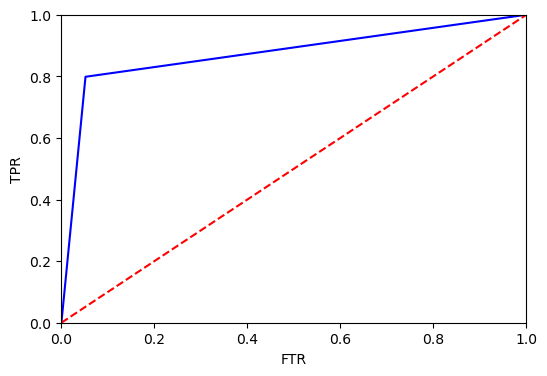

Runtime = 0:01:26.897899


In [33]:
#XGBoost
from xgboost import XGBClassifier,plot_importance

xgbmodel = XGBClassifier()

start=datetime.datetime.now()
xgbmodel.fit(X_train, y_train)
end=datetime.datetime.now()

y_xgb_pred=xgbmodel.predict(X_test)
res_output(y_test,y_xgb_pred)
print('Runtime =',end-start)

Confusion Matrix:
[[121963   7251]
 [  6561  27223]] 

Accaracy:91.5263%
Precsion:78.9668%
Recall:80.5796%
F1:79.7650%
AUC:87.4840%


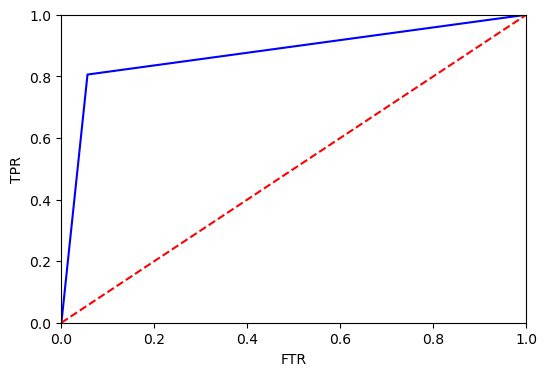

Runtime = 0:20:39.058142
{'colsample_bytree': 0.7, 'learning_rate': 0.3, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 15, 'subsample': 0.7}
0.7954027357720158


In [34]:
#GridSearch for XGB
from sklearn.model_selection import GridSearchCV

cv_xgb_param={
    'max_depth': [4, 6],
    'min_child_weight': [3, 5],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [5,10,15],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}
cv_xgbmodel = GridSearchCV(XGBClassifier(), param_grid=cv_xgb_param, scoring='f1')

start=datetime.datetime.now()
cv_xgbmodel.fit(X_train, y_train)
end=datetime.datetime.now()

y_cv_xgb_pred=cv_xgbmodel.predict(X_test)
res_output(y_test,y_cv_xgb_pred)
print('Runtime =',end-start)
print(cv_xgbmodel.best_params_)
print(cv_xgbmodel.best_score_)

<BarContainer object of 20 artists>

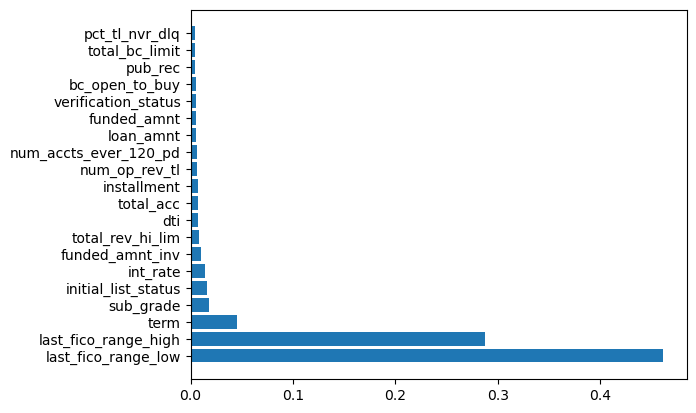

In [35]:
n_top_features = 20
sorted_idx = cv_xgbmodel.best_estimator_.feature_importances_.argsort()[::-1]
plt.barh(X0.columns[sorted_idx][:n_top_features], cv_xgbmodel.best_estimator_.feature_importances_[sorted_idx][:n_top_features ])

#plot_importance(cv_xgbmodel.best_estimator_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


C:\Users\houfang\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

C:\Users\houfang\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

C:\Users\houfang\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

C:\Users\houfang\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

C:\Users\houfang\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_g

C:\Users\houfang\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

C:\Users\houfang\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

C:\Users\houfang\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

C:\Users\houfang\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning:

The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.

C:\Users\houfang\miniconda3\lib\site-packages\sklearn\linear_model\_stochastic_g

Confusion Matrix:
[[117036  12178]
 [  3635  30149]] 

Accaracy:90.2987%
Precsion:71.2288%
Recall:89.2405%
F1:79.2238%
AUC:89.9079%


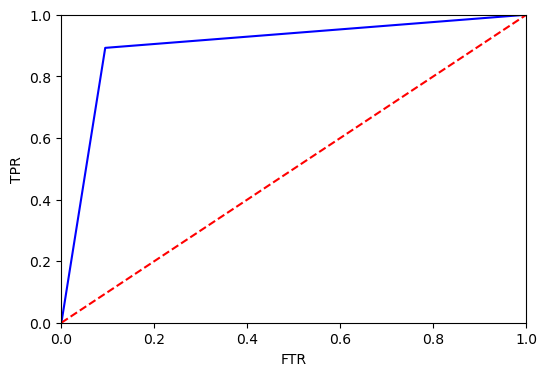

Runtime = 0:04:11.252177


In [36]:
# Ensemble SGD model
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import matthews_corrcoef, make_scorer

param_grid = [{'loss': ['hinge'],
               'alpha': [10.0**k for k in range(-3,4)],
               'max_iter': [1000],
               'tol': [1e-3],
               'random_state': [42],
               'class_weight': [None, 'balanced'],
               'warm_start': [True]},
              {'loss': ['log'],
               'penalty': ['l2', 'l1'],
               'alpha': [10.0**k for k in range(-3,4)],
               'max_iter': [1000],
               'tol': [1e-3],
               'random_state': [42],
               'warm_start': [True]}]
grid = GridSearchCV(estimator=SGDClassifier(), param_grid=param_grid, scoring=make_scorer(matthews_corrcoef), 
                    n_jobs=1, pre_dispatch=1, verbose=1, return_train_score=True)

start=datetime.datetime.now()
grid.fit(X_train, y_train)
end=datetime.datetime.now()

y_SGDCpred = grid.predict(X_test)

res_output(y_test,y_SGDCpred)  
print('Runtime =',end-start)

## <font color=blue>Phase 5: Summary and Conclusion</font>

1. For a classification task with many attributes, a lot of time and resources are spent on data preprocessing.<br>
2. In addition to simple mean filling, median filling, mode filling, and pre/post value filling, you can also use more complex random forest filling.<br>
3. Outlier handling can use intuitive quantile thresholds, and methods such as Z-Score, One-class SVM, Isolation Forest, and more are available in Sklearn.<br>
4. In correlation profiling, although many attributes are categorical values, the calculation of linear correlation coefficients still makes sense because a linear integer sequence is used for assignment transformation.The results can also be compared with the output of the 'plot_importance'.<br>
5.  The 'fico_range', 'term', 'sub_grade', 'initial_list_status'  and 'int_rate' are the attributes that have a large impact on the final prediction outcome. 
6. If a user who will not default incorrectly predicts that it will default, the number of customers is reduced and revenue is affected.<br>
7. If a user who will default incorrectly predicts that it will not default, it increases risk and reduces profits.<br>